In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 256
CHANNELS = 3

In [ ]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/Colab Notebooks/output.zip','r') as Zobject:
  Zobject.extractall('/content/drive/MyDrive/Colab Notebooks/output')

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/output/output/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 12804 images belonging to 10 classes.


In [5]:
train_generator.class_indices

{'Tomato_Bacterial_spot': 0,
 'Tomato_Early_blight': 1,
 'Tomato_Late_blight': 2,
 'Tomato_Leaf_Mold': 3,
 'Tomato_Septoria_leaf_spot': 4,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 5,
 'Tomato__Target_Spot': 6,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 7,
 'Tomato__Tomato_mosaic_virus': 8,
 'Tomato_healthy': 9}

In [6]:
class_names = list(train_generator.class_indices.keys())
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [7]:
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break

[[[0.7485897  0.68976617 0.67800146]
  [0.74997306 0.69114953 0.6793848 ]
  [0.7513564  0.6925329  0.68076813]
  ...
  [0.7398503  0.6771051  0.6771051 ]
  [0.7262803  0.6635352  0.6635352 ]
  [0.69411767 0.6313726  0.6313726 ]]

 [[0.7464443  0.68762076 0.67585605]
  [0.7456538  0.6868303  0.6750656 ]
  [0.74486333 0.6860398  0.6742751 ]
  ...
  [0.7406407  0.6778956  0.6778956 ]
  [0.72351366 0.66076857 0.66076857]
  [0.69411767 0.6313726  0.6313726 ]]

 [[0.7621106  0.70328707 0.69152236]
  [0.7613202  0.70249665 0.6907319 ]
  [0.7605297  0.7017062  0.68994147]
  ...
  [0.7414312  0.6786861  0.6786861 ]
  [0.720747   0.65800184 0.65800184]
  [0.69411767 0.6313726  0.6313726 ]]

 ...

 [[0.6042439  0.5297341  0.5022831 ]
  [0.5655276  0.49101782 0.46356684]
  [0.539152   0.46464226 0.43719125]
  ...
  [0.48906308 0.41455328 0.39102387]
  [0.48649406 0.41198424 0.38845482]
  [0.48392498 0.4094152  0.38588578]]

 [[0.60305816 0.5285483  0.5010973 ]
  [0.56276095 0.48825112 0.46080014]


In [8]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/output/output/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 1597 images belonging to 10 classes.


In [9]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/output/output/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 1610 images belonging to 10 classes.


In [ ]:
train_generator.num_classes

10

In [ ]:
test_generator.num_classes

10

In [10]:
test_generator.class_indices

{'Tomato_Bacterial_spot': 0,
 'Tomato_Early_blight': 1,
 'Tomato_Late_blight': 2,
 'Tomato_Leaf_Mold': 3,
 'Tomato_Septoria_leaf_spot': 4,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 5,
 'Tomato__Target_Spot': 6,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 7,
 'Tomato__Tomato_mosaic_virus': 8,
 'Tomato_healthy': 9}

In [11]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = train_generator.num_classes

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
steps_per_epoch = 12804/128
validation_steps = 1597/128
print(steps_per_epoch,validation_steps)

100.03125 12.4765625


In [15]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)

history = model.fit(train_generator, steps_per_epoch = 100, batch_size=128,
                    epochs=20, validation_data = validation_generator,
                    validation_steps = 12,verbose = 1,
                    callbacks=[earlystopping])

Epoch 1/20
100/100 [==============================] - 991s 10s/step - loss: 1.9756 - accuracy: 0.2862 - val_loss: 1.7763 - val_accuracy: 0.3880
Epoch 2/20
100/100 [==============================] - 752s 7s/step - loss: 1.6205 - accuracy: 0.4306 - val_loss: 1.4200 - val_accuracy: 0.5208
Epoch 3/20
100/100 [==============================] - 646s 6s/step - loss: 1.3215 - accuracy: 0.5375 - val_loss: 1.3291 - val_accuracy: 0.5495
Epoch 4/20
100/100 [==============================] - 619s 6s/step - loss: 1.1028 - accuracy: 0.6212 - val_loss: 1.0794 - val_accuracy: 0.6224
Epoch 5/20
100/100 [==============================] - 616s 6s/step - loss: 0.9988 - accuracy: 0.6525 - val_loss: 0.8594 - val_accuracy: 0.7292
Epoch 6/20
100/100 [==============================] - 573s 6s/step - loss: 0.8386 - accuracy: 0.7116 - val_loss: 0.7450 - val_accuracy: 0.7422
Epoch 7/20
100/100 [==============================] - 556s 6s/step - loss: 0.6959 - accuracy: 0.7610 - val_loss: 0.7472 - val_accuracy: 0.729

In [16]:
scores = model.evaluate(test_generator)

51/51 [==============================] - 399s 8s/step - loss: 0.4182 - accuracy: 0.8969


In [17]:
predictions = model.predict(test_generator)

51/51 [==============================] - 105s 2s/step


In [24]:
import numpy as np
y_pred = [np.argmax(i) for i in predictions]
y_pred[0]

6

In [19]:
len(test_generator)

51

In [20]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 100}

In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

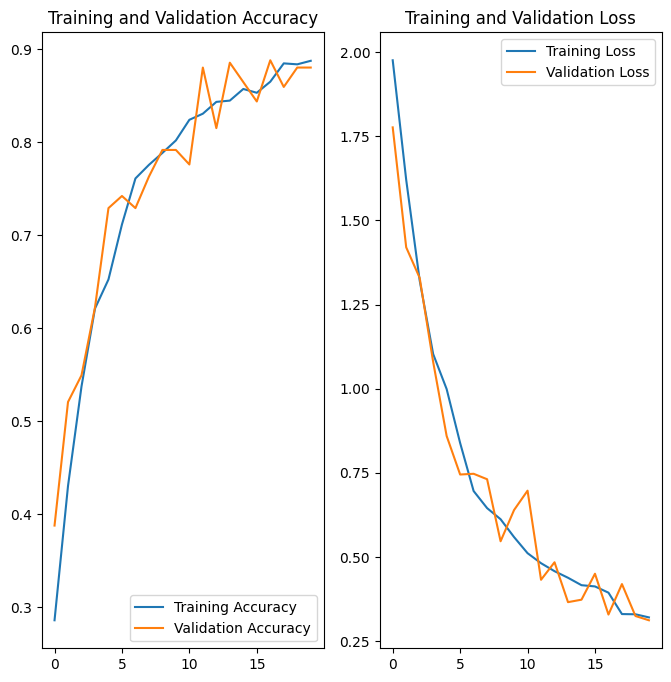

In [25]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

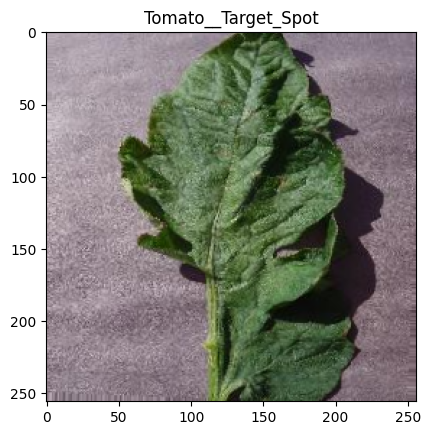

In [26]:
import numpy as np
for image_batch, label_batch in test_generator:
#     print(label_batch)
    plt.imshow(image_batch[0])
    plt.title(class_names[label_batch[0].astype(int)])
    break

In [27]:
class_names[y_pred[0]]

'Tomato__Target_Spot'

In [28]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 130ms/step


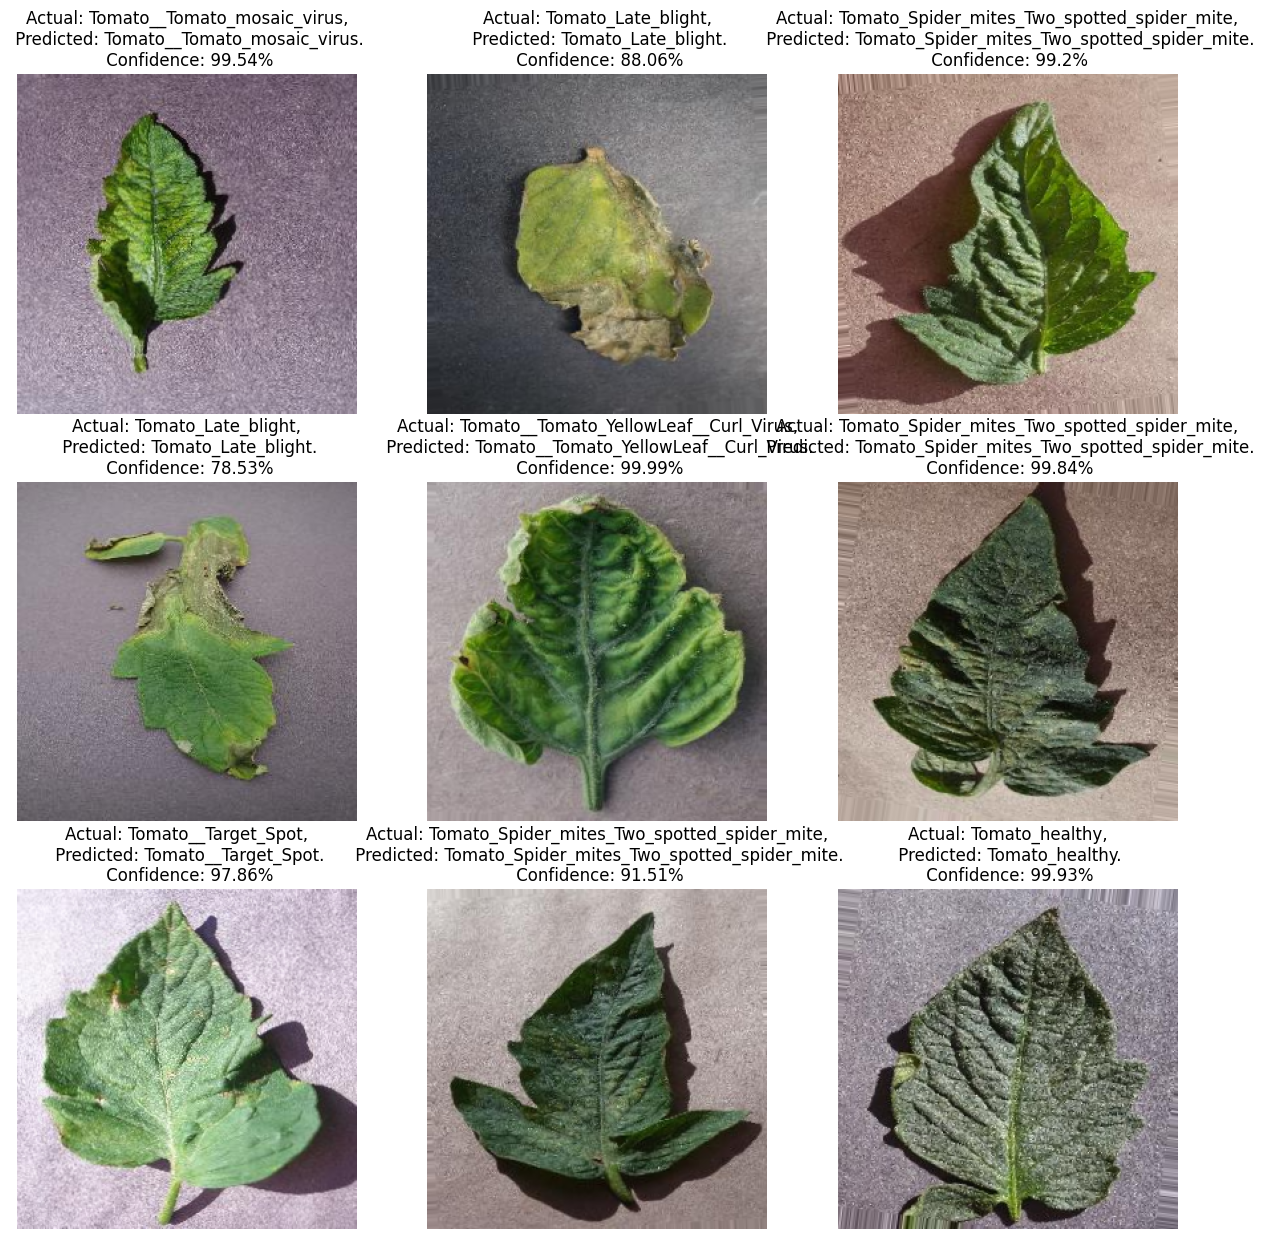

In [29]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break